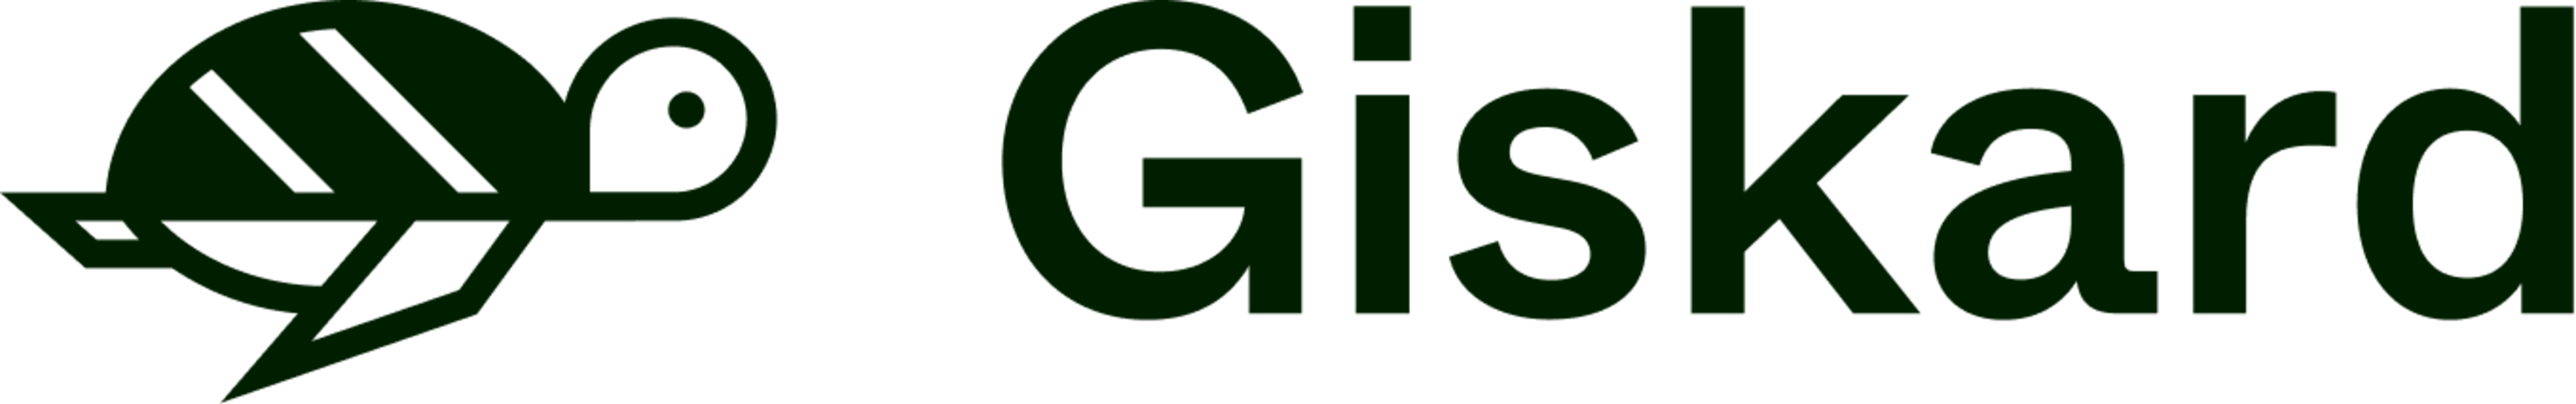

# About Giskard

Open-Source CI/CD platform for ML teams. Deliver ML products, better & faster. 

*   Collaborate faster with feedback from business stakeholders.
*   Deploy automated tests to eliminate regressions, errors & biases.

🏡 [Website](https://giskard.ai/)

📗 [Documentation](https://docs.giskard.ai/)

# Start by creating a ML model 🚀🚀🚀

In [ ]:
from sklearn import datasets 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np

In [ ]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data,columns=iris.feature_names)

d = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df_iris['target'] = pd.Series(iris.target).map(d)

In [ ]:
X = df_iris.drop(columns= "target")
y = df_iris['target']

##Preprocessing steps with multiple feature engineering steps:

*   Add / remove variables
*   Scaling of numeric variable
*   Onehot encoding of categorical variable

In [ ]:
#Create a new numerical variable: Sepal area
X["sepal area"] = X["sepal length (cm)"] * X["sepal width (cm)"]

#Turn sepal width (cm) into a categorical variable
bins = [-np.inf, 2.5, 3.5, np.inf]
labels = ["small","medium","big"]
X["cat_sepal_width"] = pd.cut(X["sepal width (cm)"], bins=bins, labels=labels)

#Scale all the numerical variables
std_slc = StandardScaler()
num_cols = ["sepal area", "petal length (cm)", "petal width (cm)"]
X[num_cols] = std_slc.fit_transform(X[num_cols])

#Use OneHotEncoder with cat_sepal_width
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
arr =  one_hot_encoder.fit_transform(X[['cat_sepal_width']]).toarray()
X = X.join(pd.DataFrame(arr))

#Remove Sepal length, sepal width and cat_sepal_width
X = X.drop(columns= ["sepal width (cm)", "sepal length (cm)", "cat_sepal_width"])

## Train a model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

In [ ]:
def wrapped_prediction_function(X):
  #Create a new numerical variable: Sepal area
  X["sepal area"] = X["sepal length (cm)"] * X["sepal width (cm)"]
  
  #Turn sepal width (cm) into a categorical variable
  bins = [-np.inf, 2.5, 3.5, np.inf]
  labels = ["small","medium","big"]
  X["cat_sepal_width"] = pd.cut(X["sepal width (cm)"], bins=bins, labels=labels)

  #Scale all the numerical variables
  num_cols = ["sepal area", "petal length (cm)", "petal width (cm)"]
  X[num_cols] = std_slc.transform(X[num_cols])

  #Use OneHotEncoder with cat_sepal_width
  arr =  one_hot_encoder.transform(X[['cat_sepal_width']]).toarray()
  X = X.join(pd.DataFrame(arr))

  #Remove Sepal length, sepal width and cat_sepal_width
  X = X.drop(columns= ["sepal width (cm)", "sepal length (cm)", "cat_sepal_width"])

  return knn.predict_proba(X)

# Upload the model in Giskard without pipeline 🚀🚀🚀

### Initiate a project


In [ ]:
!pip install giskard

In [ ]:
from giskard.giskard_client import GiskardClient

url = "http://localhost:19000" # if docker image is running on your local
#url = "http://app.giskard.ai" # If you want to upload on giskard URL 
token = "XXX" #Find your token in the Admin tab of your app (login: admin; password: admin)
client = GiskardClient(url, token)

iris = client.create_project("iris", "Classification of Iris dataset", "Project to classify flowers")

#If you've already created a project with the key "iris" use
#iris = client.get_project("iris")

In [ ]:
df_iris

### Upload your model and a dataset (see [documentation](https://docs.giskard.ai/start/guides/upload-your-model))

In [ ]:
iris.upload_model_and_df(
    prediction_function=wrapped_prediction_function, # Python function which takes pandas dataframe as input and returns probabilities for classification model OR returns predictions for regression model
    model_type='classification', # "classification" for classification model OR "regression" for regression model
    df=df_iris, #the dataset you want to use to inspect your model
    column_types={"sepal length (cm)":"numeric", "sepal width (cm)": "numeric", "petal length (cm)": "numeric", "petal width (cm)": "numeric", "target":"category"}, #all the column types of df
    target='target', #the column name in df corresponding to the actual target variable (ground truth).
    feature_names=["sepal length (cm)","sepal width (cm)", "petal length (cm)", "petal width (cm)"],# List of the feature names of prediction_function
    model_name='knn_model_with_feature_names', # Name of the model
    dataset_name='iris_data', # Name of the dataset
    classification_labels=knn.classes_ # List of the classification labels of your prediction
)